# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- The collected dataset compasses 17 campaigns that occured between May 2008 and November 2010, corresponding to a total of 79354 contacts.

- During these phone campaigns, an attractive long-term deposit
application, with good interest rates, was offered.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score
from time import time


In [103]:
df = pd.read_csv('/content/drive/MyDrive/AI Course with UC Berkely/practical_application_starter/module_17_starter-Practical application III/data/bank-additional-full.csv',sep=";")

In [104]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [105]:
# check for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The objective is to predict whether client will subscribe to a term depsoit (yes=1) or not (no=0)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [107]:
# bank information features
features_bank_info = df.iloc[:,:7].columns.tolist()
features_bank_info

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

In [108]:
df[features_bank_info]

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [109]:
# encode them using OneHotEncoding because there is no ordinal relationship in data categories and drop original
ohe = OneHotEncoder()

#fit and transform the data
features_encoded = ohe.fit_transform(df[features_bank_info])

# Create dataframe with encoded data
df_encoded = pd.DataFrame(features_encoded.toarray(), columns = ohe.get_feature_names_out(features_bank_info))

# Ensure correct column names and shape
print("Shape of df_encoded:", df_encoded.shape)
print("Columns of df_encoded:", df_encoded.columns)


# add target column to it
df_encoded['y'] = df['y'].map({"yes":1,"no":0}) # df['y'].apply(lambda x : 1 if x="yes" else 0) # df['y'].str.contains("yes").astype(int)

df_encoded.sample(5)


Shape of df_encoded: (41188, 111)
Columns of df_encoded: Index(['age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23',
       'age_24', 'age_25', 'age_26',
       ...
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes'],
      dtype='object', length=111)


,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,y
19511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
37747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
35303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
13221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
30949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [110]:
df_encoded['y'].value_counts(normalize=True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

Outcome is biased as 88% of sampled population did not subscribed to long term deposit from campaign

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [111]:
X = df_encoded.drop('y', axis=1) # features
y = df_encoded['y'] # target

print(f"Number of rows are {X.shape[0]} and columns are {X.shape[1]} in features")
print(f"Number of rows are {y.shape[0]} and columns is 1 in target")

Number of rows are 41188 and columns are 111 in features
Number of rows are 41188 and columns is 1 in target


In [112]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify= y, shuffle=True)
print("30% of data is kept as test data")
print(f"Training data X and y has rows and columns {X_train.shape} and {y_train.shape}")
print(f"Test data X and y has rows and columns {X_test.shape} and {y_test.shape}")

30% of data is kept as test data
Training data X and y has rows and columns (30891, 111) and (30891,)
Test data X and y has rows and columns (10297, 111) and (10297,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
# Calculate the frequency of each class
class_counts = df_encoded['y'].value_counts()

# most frequent class is
majority_class = class_counts.idxmax () # return row label of maximum value

# baseline accuracy is
baseline_accuracy = round(class_counts[majority_class] / len(df['y']),5)*100

print(f"baseline performance that our classifier should aim to beat is {baseline_accuracy} % ")

baseline performance that our classifier should aim to beat is 88.735 % 


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
# Instantiate Logistic Regression
lr = LogisticRegression(max_iter=5000)

# Fit the model to training data
lr.fit(X_train,y_train)

# predict the data
y_pred_lr = lr.predict(X_test)

y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
lr_accuracy = accuracy_score(y_test,y_pred_lr)
lr_precision = precision_score(y_test,y_pred_lr)
lr_recall = recall_score(y_test,y_pred_lr)
print(f" Accuracy of Logistic Regression model is {lr_accuracy:.3%}")
print(f" Precision of Logistic Regression model is {lr_precision:.3%}")
print(f" Recall of Logistic Regression model is {lr_recall:.3%}")

 Accuracy of Logistic Regression model is 88.628%
 Precision of Logistic Regression model is 38.298%
 Recall of Logistic Regression model is 1.552%


### Model Evaluation Metrics

Besides accuracy, consider using other evaluation metrics such as precision, recall, F1-score, and confusion matrix. These metrics provide a more comprehensive understanding of the model's performance, especially in the case of imbalanced datasets.

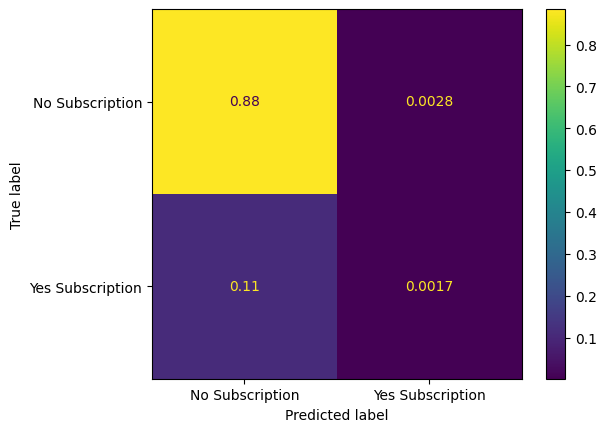

In [ ]:
# Confusion Matrix , #We want to understanding the overall accuracy and error rates across all classes, "all" normalization is suitable.
y_true = ["No Subscription" if label== 0 else "Yes Subscription" for label in y_test]
y_pred = ["No Subscription" if label== 0 else "Yes Subscription" for label in y_pred_lr]

ConfusionMatrixDisplay.from_predictions(y_true,y_pred, normalize="all")

In [ ]:
svc = SVC(probability=True)
# fit the model
svc.fit(X_train,y_train)

# Calculate the model accuracy score on the test data
accuracy = svc.score(X_test, y_test)
print("Model Accuracy Score:", accuracy)

# predict values
y_pred_svc = svc.predict(X_test)

# find probability of positive class using indexing [:, 1]
y_pred_proba = svc.predict_proba(X_test)[:,1]

Model Accuracy Score: 0.8868602505584151


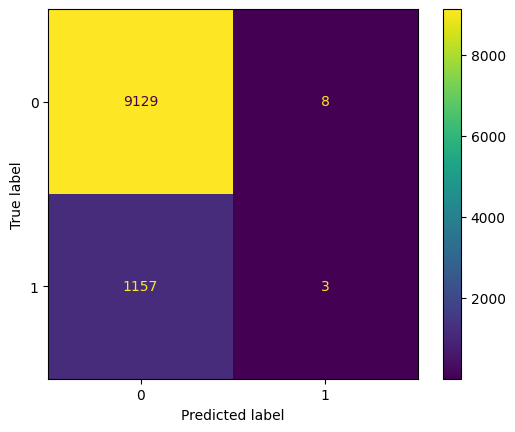

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


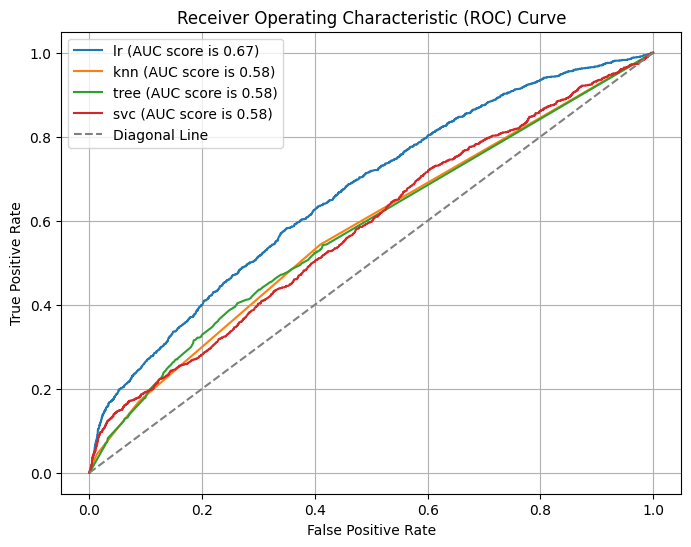

ValueError: All arrays must be of the same length

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time

classifiers = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svc': SVC(probability=True)
}

results = {"Model": [],"Train Time":[],"Train Accuracy": [], "Test Accuracy": [],
           "Predict Probability":[], "Precision": [], "Recall": [], "F1-score": [], "ROC AUC Score": []}

plt.figure(figsize=(8, 6))

for name, classifier in classifiers.items():
    start_time = time()
    classifier.fit(X_train, y_train)
    end_time = time()

    # Predict test data
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    y_test_proba = classifier.predict_proba(X_test)[:, 1]

    # Model evaluations
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    fit_time = end_time - start_time
    predict_probability = classifier.predict_proba(X_test)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    roc_auc_value = roc_auc_score(y_test, y_test_proba)


    results['Model'].append(classifier)
    results['Train Time'].append(fit_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(test_precision)
    results['Recall'].append(test_recall)
    results['F1-score'].append(test_f1_score)
    results['ROC AUC Score'].append(roc_auc_value)



  # Plot ROC curve
    fpr, tpr,_ = roc_curve(y_test, y_test_proba) #_ is showing threshold
    plt.plot(fpr, tpr, label=f"{name} (AUC score is {roc_auc_value:.2f})")


# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Diagonal Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,Train Time,Train Accuracy,Test Accuracy,Predict Probability,Precision,Recall,F1-score,ROC AUC Score
0,lr,1.632045,0.888252,0.886278,"[[0.9193111001298042, 0.08068889987019576], [0...",0.382979,0.015517,0.029826,0.665456
1,knn,0.016399,0.891522,0.880645,"[[1.0, 0.0], [1.0, 0.0], [0.8, 0.2], [1.0, 0.0...",0.298246,0.043966,0.076634,0.578543
2,tree,0.422114,0.917775,0.867243,"[[1.0, 0.0], [1.0, 0.0], [0.5, 0.5], [1.0, 0.0...",0.241895,0.083621,0.124279,0.580578
3,svc,937.142811,0.888414,0.886860,"[[0.892751493743832, 0.10724850625616798], [0....",0.272727,0.002586,0.005124,0.580639


**Conclusion**

- Reasonable Train and Test Accuracy: The Logistic Regression model achieved a train accuracy of 88.83% and a test accuracy of 88.63%. While these values are slightly lower than the Decision Tree's train accuracy, they are still quite high, indicating that the model generalizes well to unseen data.

- Better ROC AUC Score: The Logistic Regression model also achieved a higher ROC AUC score of 0.665, compared to the Decision Tree's score of 0.581. A higher ROC AUC score suggests better overall performance in distinguishing between positive and negative classes.

- Interpretability: Logistic Regression models are inherently interpretable, making it easier to understand the impact of individual features on the model's predictions. This can be valuable in fields where interpretability and transparency are important.

- Faster Training Time: While the Logistic Regression model has a longer training time compared to KNN, it is significantly faster than the Decision Tree and SVC models. This efficiency can be advantageous, especially when dealing with large datasets or when training multiple models.

Overall, considering the balance between accuracy, interpretability, and efficiency, the Logistic Regression model appears to be the most suitable choice for further analysis and application in this scenario.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# Define classifiers
classifiers = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svc': SVC(probability=True)
}

# Define parameter grid for each classifier
param = {
    'lr': {'max_iter': [5000], 'C': [0.1, 0.5, 1.0]},
    'knn': {'n_neighbors': [3, 5, 7]},
    'tree': {'max_depth': [None, 5, 10]},
    'svc': {'C': [0.001,0.1, 0.5, 1.0]}
}


In [ ]:
results = {
    "Model": [],
    "Train Time": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": [],
    "ROC AUC Score": []
}

plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


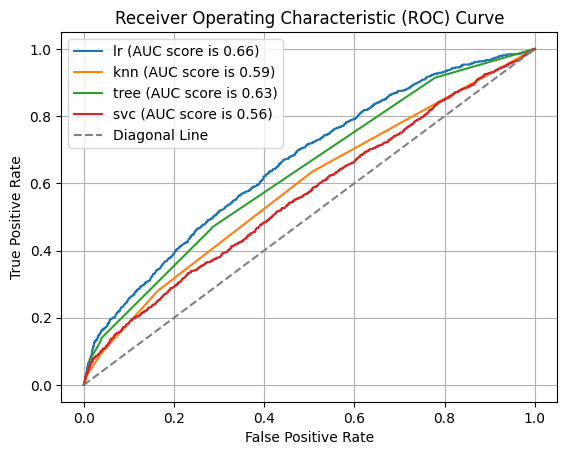

In [ ]:
# Instantiate grid search for each classifier
for name, classifier in classifiers.items():
    grid = GridSearchCV(estimator=classifier, param_grid=param[name], scoring="accuracy", n_jobs=-1)

    # Start the timer to calculate the total time taken for the entire grid search process
    start_time = time()

    # Fit data to grid
    grid.fit(X_train, y_train)

    # End the timer
    end_time = time()

    # Get the best estimator
    best_clf = grid.best_estimator_

    # Predict for train and test data
    y_train_pred = best_clf.predict(X_train)
    y_test_pred = best_clf.predict(X_test)
    y_test_proba = best_clf.predict_proba(X_test)[:, 1]

    # Model evaluations
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    fit_time = end_time - start_time
    test_precision = precision_score(y_test, y_test_pred,zero_division=0)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    roc_auc_value = roc_auc_score(y_test, y_test_proba)

    # Append results to dictionary
    results['Model'].append(classifier)
    results['Train Time'].append(fit_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(test_precision)
    results['Recall'].append(test_recall)
    results['F1-score'].append(test_f1_score)
    results['ROC AUC Score'].append(roc_auc_value)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)  # _ is showing threshold
    plt.plot(fpr, tpr, label=f"{name} (AUC score is {roc_auc_value:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Diagonal Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Create DataFrame from results
results_df = pd.DataFrame(results)


In [ ]:
results_df

Size of the Grid: The size of the grid is determined by the number of hyperparameters to search over and the number of values for each hyperparameter. In this case, there are 3 values for lr__max_iter, 3 for knn__n_neighbors, 3 for tree__max_depth, and 3 for svc__C, resulting in a total of 3×3×3×3=81 parameter combinations.

Number of Folds in Cross-Validation: By default, GridSearchCV uses 5-fold cross-validation. Each combination of hyperparameters will be evaluated on each fold, so each model will be trained and tested 5 times.

Available Cores for Parallel Processing: Since n_jobs=-1 is used, all available cores (12 in this case) will be utilized for parallel processing.

Given that the size of the training data is not extremely large and the models being trained are not overly complex, we can expect the time to fit a single model to be relatively short. However, with 81 parameter combinations and 5-fold cross-validation, a total of 81×5=405 models will be trained and evaluated.

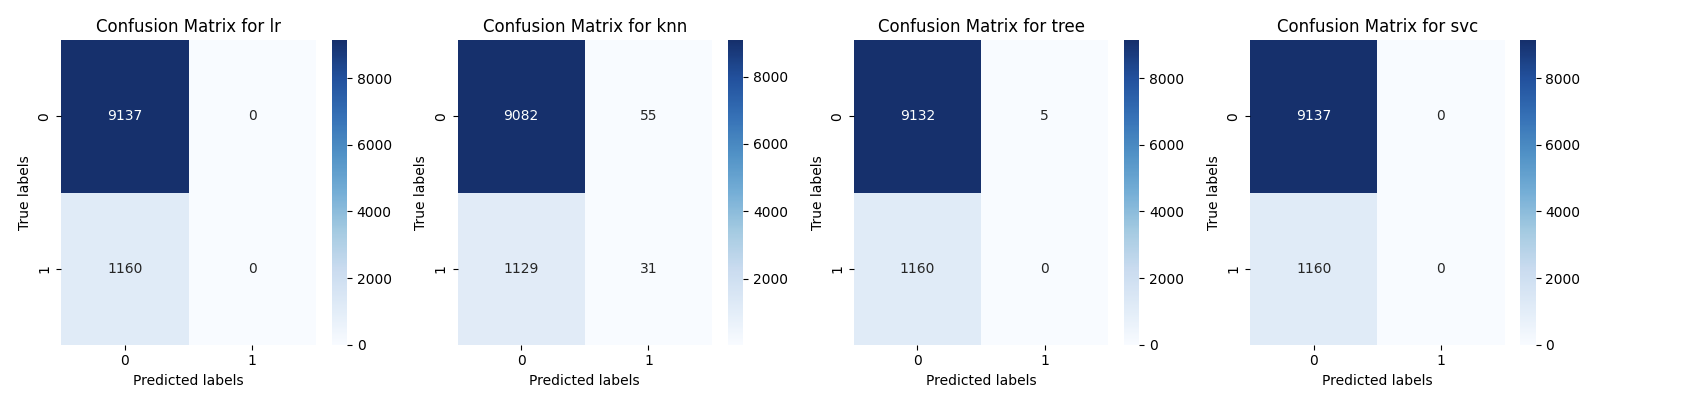

### Analysis and Synthesis

1. Accuracy: All models achieved similar performance on training and test datasets, indicating there is no significant overfitting or underfitting.
2. Fit Times: KNN has the shortes mean fit time, while Support Vector Machine has the longest mean fit time. This suggests that KNN is faster to train, whereas SVM is slowed.
3. Interpretation: The high training and test accuracies across all modles suggests that they are capturing the underlying data pattern reasonable well.
4. Higher training score than test score indicates overfitting but in this case, the difference is minimal, suggesting that the models generalize well to unseen data.

### We use DecisonTree as a model to find most important features

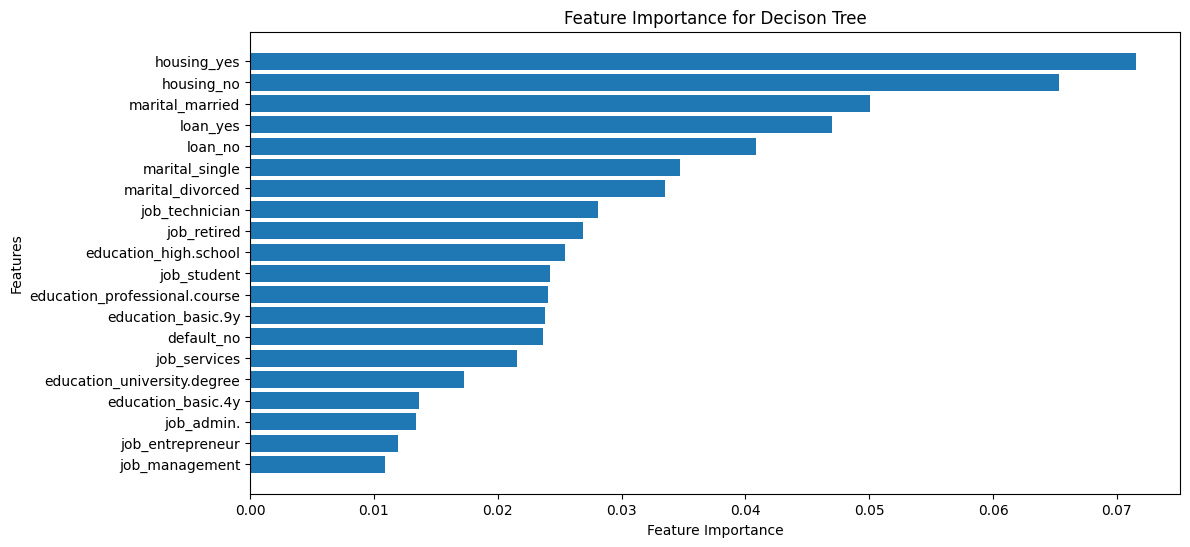

In [113]:
# instantiate the decision tree model
tree = DecisionTreeClassifier()

# fit the data to model
tree.fit(X_train,y_train)

# get feature importance
feature_importance = tree.feature_importances_

# get indicies of top 10 features with highest importance
n_top_features =20
top_20_indices_tree = feature_importance.argsort()[-n_top_features:][::-1]
top_20_features_tree = X_train.columns[top_20_indices_tree]

# visualize it
plt.figure(figsize=(12,6))
plt.barh(top_20_features_tree,feature_importance[top_20_indices_tree]) # plt.barh(X_train.columns,feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Decison Tree")

plt.gca().invert_yaxis() # this will display most improtant feature at top

plt.show()

|Features used earlier| Feature to consider|
|-----------------|-------------------|
|Age| No|
|Job|Yes|
|Marital|Yes|
|Education|Yes|
|Default|Yes|
|housing|Yes|
|loan|Yes|

In [119]:
# Filter the dataset to include only the top important features
X_train_filtered = X_train[top_20_features_tree]
X_test_filtered = X_test[top_20_features_tree]

In [120]:
# Instantiate the decision tree classifier
tree_filtered = DecisionTreeClassifier()

# Fit the model to the filtered training data
tree_filtered.fit(X_train_filtered, y_train)

# Evaluate the model's accuracy on the filtered testing set
accuracy_filtered = tree_filtered.score(X_test_filtered, y_test)
print(f"Accuracy on testing set with top {n_top_features} features: {accuracy_filtered:.2f}")


Accuracy on testing set with top 20 features: 0.88


In [123]:
param_grid = {
    'max_depth':[None,5,10,20,30],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Estimator is: DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
Accuracy on testing set with top 20 features and best hyperparameters: 0.89


In [130]:
grid.predict_proba(X_test_filtered)

array([[0.90493511, 0.09506489],
       [0.90493511, 0.09506489],
       [0.87646468, 0.12353532],
       ...,
       [0.90493511, 0.09506489],
       [0.94676471, 0.05323529],
       [0.90493511, 0.09506489]])

In [133]:
# Create a grid search object
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = param_grid, cv = 5)

# start the timer
start_time = time()

# Fit the grid search object
grid.fit(X_train_filtered, y_train)

results = {
    "Accuracy": [grid.best_score_],
    "best parameters" : [grid.best_params_]
}

# stop the timer
end_time = time()

# Calculate fit time
fit_time = end_time - start_time

# calculate ROC_AUC score,extracts the probability of the positive class (class 1)
roc_auc_value = roc_auc_score(y_test, grid.predict_proba(X_test_filtered)[:,1])

# Create a dataframe to store the results
final_results_df = pd.DataFrame(results)

# add fit time
final_results_df['fit time'] = fit_time
final_results_df['roc_auc_score'] = roc_auc_value

final_results_df

,Accuracy,best parameters,fit time,roc_auc_score
0,0.887346,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",11.707487,0.635376


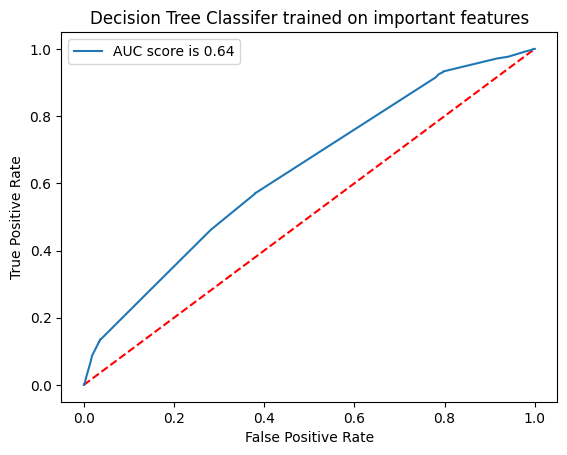

In [146]:
# plot ROC curve
y_test_proba = grid.predict_proba(X_test_filtered)[:,1]

fpr, tpr, _ = roc_curve(y_test,y_test_proba)

# plot a digonal line
plt.plot([0,1],[0,1], ls="--", c='r')

# plot the data points
plt.plot(fpr,tpr, label=f'AUC score is {roc_auc_score(y_test,y_test_proba):.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifer trained on important features")
plt.legend()

plt.show()

##### Questions